In [1]:
import pandas as pd
from rdkit import Chem


In [2]:
data = pd.read_csv('../data/SAMPL.csv')

In [3]:
data['rdkit_mol'] = data['smiles'].apply(lambda x: Chem.MolFromSmiles(x))
data.head()

,iupac,smiles,expt,calc,rdkit_mol
0,"4-methoxy-N,N-dimethyl-benzamide",CN(C)C(=O)c1ccc(cc1)OC,-11.01,-9.625,<rdkit.Chem.rdchem.Mol object at 0x7f02f03926c0>
1,methanesulfonyl chloride,CS(=O)(=O)Cl,-4.87,-6.219,<rdkit.Chem.rdchem.Mol object at 0x7f02f0391b60>
2,3-methylbut-1-ene,CC(C)C=C,1.83,2.452,<rdkit.Chem.rdchem.Mol object at 0x7f02f0393290>
3,2-ethylpyrazine,CCc1cnccn1,-5.45,-5.809,<rdkit.Chem.rdchem.Mol object at 0x7f02f0392f10>
4,heptan-1-ol,CCCCCCCO,-4.21,-2.917,<rdkit.Chem.rdchem.Mol object at 0x7f02f0393990>


In [5]:
data['no_atoms'] = data['rdkit_mol'].apply(lambda x: len(Chem.AddHs(x).GetAtoms()))
data.head()

,iupac,smiles,expt,calc,rdkit_mol,no_atoms
0,"4-methoxy-N,N-dimethyl-benzamide",CN(C)C(=O)c1ccc(cc1)OC,-11.01,-9.625,<rdkit.Chem.rdchem.Mol object at 0x7f02f03926c0>,26
1,methanesulfonyl chloride,CS(=O)(=O)Cl,-4.87,-6.219,<rdkit.Chem.rdchem.Mol object at 0x7f02f0391b60>,8
2,3-methylbut-1-ene,CC(C)C=C,1.83,2.452,<rdkit.Chem.rdchem.Mol object at 0x7f02f0393290>,15
3,2-ethylpyrazine,CCc1cnccn1,-5.45,-5.809,<rdkit.Chem.rdchem.Mol object at 0x7f02f0392f10>,16
4,heptan-1-ol,CCCCCCCO,-4.21,-2.917,<rdkit.Chem.rdchem.Mol object at 0x7f02f0393990>,24


<Axes: ylabel='Frequency'>

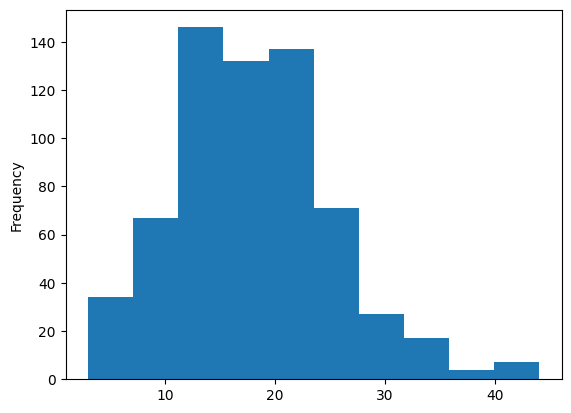

In [8]:
data['no_atoms'].plot(kind='hist')

In [9]:
data['no_atoms'].describe()

count    642.000000
mean      18.088785
std        7.129944
min        3.000000
25%       13.000000
50%       17.000000
75%       22.000000
max       44.000000
Name: no_atoms, dtype: float64